In [1]:
import pandas as pd
import pytextrank
import spacy
from spacy.tokens import Span
from germalemma import GermaLemma
from keybert import KeyBERT
import pandas as pd

In [2]:
#Then quit and come back later… and open with pickle.load...
import pickle
with open('Data_KeyBert_new.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
data

,Documents,file_name,Text,Ground_Truth,Text_Sentences
0,document1,Nacaps-W1_questionnaire,"""Die Hochschule, an der Sie im Dezember 2018 z...","'wissenschaftssystem', 'betreuung', 'wissensch...","[Die Hochschule, an der Sie im Dezember 2018 z..."
1,document2,WeGe_W2,"""Wie ist dieser studienvorbereitende Kurs verl...","'integration', 'geflüchtete', 'studienkolleg',...",[Wie ist dieser studienvorbereitende Kurs verl...
2,document3,StuMa2020,"""Welchen Studienabschluss haben Sie in Ihrem l...","'beruflicher verbleib von exmatrikulierten', '...",[Welchen Studienabschluss haben Sie in Ihrem l...
3,document4,Studierdenensurvey2016,"""An welcher Art Hochschule studieren Sie. Univ...","'evaluation', 'qualifikation', 'effizienz', 's...","[An welcher Art Hochschule studieren Sie., Wel..."
4,document5,Absolventen_2009.2_Haupt,"""Wie würden Sie Ihre derzeitige Tätigkeit bzw....",'hochschulforschung',[Wie würden Sie Ihre derzeitige Tätigkeit bzw....
5,document6,Promopanel_W4,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'...",[Waren oder sind Sie seit der letzten Befragun...
6,document7,Studienberechtigte_2008.3,"""Wie zufrieden sind Sie mit Ihrem bisherigen B...","'studienberechtigte', 'hochschulforschung'",[Wie zufrieden sind Sie mit Ihrem bisherigen B...
7,document8,Wissenschaftlerbefragung2016,"""In welcher Sprache möchten Sie die Befragung ...",'hochschulforschung',[In welcher Sprache möchten Sie die Befragung ...
8,document9,Promopanel_W3,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'...",[Waren oder sind Sie seit der letzten Befragun...
9,document10,Sozialerhebung20,"""Welchen Abschluss streben Sie in Ihrem derzei...",'hochschulforschung',[Welchen Abschluss streben Sie in Ihrem derzei...


In [4]:
GT_within_text = [['wissenschaftssystem', 'betreuung', 'wissenschaftliche karriere', 'vereinbarkeit von familie und beruf', 'promovierende', 'promotion', 'finanzierung', 'mobilität', 'gesundheit'],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['masterstudium'],
 ['evaluation', 'qualifikation', 'studiensituation'],
 [''],
 ['promotion', 'arbeitsbedingungen','wissenschaftliche aktivitäten','weiterbildung', 'auslandsaufenthalt'],
 [''],
 [''],
 ['promotion', 'arbeitsbedingungen','wissenschaftliche aktivitäten', 'weiterbildung', 'auslandsaufenthalt'],
 [''],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['promotion', 'arbeitsbedingungen', 'weiterbildung','wissenschaftliche aktivitäten', 'auslandsaufenthalt', 'gesundheit'],
 ['digitale lehre', 'wohnsituation', 'finanzielle situation', 'studiensituation', 'corona'],
 ['promotion', 'arbeitsbedingungen', 'weiterbildung', 'auslandsaufenthalt'],
 [''],
 [''],
 [''],
 [''],
 ['']]

In [5]:
GT_within_text

[['wissenschaftssystem',
  'betreuung',
  'wissenschaftliche karriere',
  'vereinbarkeit von familie und beruf',
  'promovierende',
  'promotion',
  'finanzierung',
  'mobilität',
  'gesundheit'],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['masterstudium'],
 ['evaluation', 'qualifikation', 'studiensituation'],
 [''],
 ['promotion',
  'arbeitsbedingungen',
  'wissenschaftliche aktivitäten',
  'weiterbildung',
  'auslandsaufenthalt'],
 [''],
 [''],
 ['promotion',
  'arbeitsbedingungen',
  'wissenschaftliche aktivitäten',
  'weiterbildung',
  'auslandsaufenthalt'],
 [''],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['promotion',
  'arbeitsbedingungen',
  'weiterbildung',
  'wissenschaftliche aktivitäten',
  'auslandsaufenthalt',
  'gesundheit'],
 ['digitale lehre',
  'wohnsituation',
  'finanzielle situation',
  'studiensituation',
  'corona'],
 ['promotion', 'arbeitsbedingungen', 'weiterbildung', 'auslandsaufenthalt'],
 [''],
 [''],
 [''],
 [''],
 ['']]

In [6]:
keywords_within_text = []
for i in range(len(GT_within_text)):
    keywords_within_text.append([])
    for j in range(len(GT_within_text[i])):
        if len(GT_within_text[i][j].split(" ")) == 1:
            keywords_within_text[i].append(GT_within_text[i][j])

In [7]:
keywords_within_text[13]

['promotion', 'arbeitsbedingungen', 'weiterbildung', 'auslandsaufenthalt']

In [8]:
keyphrases_within_text = []
for i in range(len(GT_within_text)):
    keyphrases_within_text.append([])
    for j in range(len(GT_within_text[i])):
        if len(GT_within_text[i][j].split(" ")) > 1:
            keyphrases_within_text[i].append(GT_within_text[i][j])

In [9]:
keyphrases_within_text

[['wissenschaftliche karriere', 'vereinbarkeit von familie und beruf'],
 [],
 [],
 [],
 [],
 ['wissenschaftliche aktivitäten'],
 [],
 [],
 ['wissenschaftliche aktivitäten'],
 [],
 [],
 ['wissenschaftliche aktivitäten'],
 ['digitale lehre', 'finanzielle situation'],
 [],
 [],
 [],
 [],
 [],
 []]

In [10]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import pickle
import sklearn
import numpy as np
import nltk 

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/pawan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/pawan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords
stop_words = stopwords.words('german')
stop_words
print(len(stop_words))
stop_words.extend(["a","ab","können","bzw", "usw","eu","wiwi","soz", "nah","dsh","and","eng","wahr", "kfz", "kiel", "öl", "fil" "sose", "ha","wi", "übt","wis","vwl","geben", "hhu","bitte","inkl", "läuft", "ggf", "ern", "te", "edv", "un","ver", "finno", "etc","ehe","kfw", "maße", "möchten", "cau","ca", "juni", "uds", "innen", "aber","ach","acht","achte","achten","achter","achtes","ag","alle","fh","allein","allem","allen","aller","allerdings","alles","allgemeinen","als","also","am","an","andere","anderen","andern","anders","au","auch","auf","aus","ausser","außer","ausserdem","außerdem","b","bald","bei","beide","beiden","beim","beispiel","bekannt","bereits","besonders","besser","üben","besten","bin","sein","können","bis","bisher","bist","c","d","da","dabei","dadurch","dafür","dagegen","daher","dahin","dahinter","damals","damit","danach","daneben","dank","dann","daran","darauf","daraus","darf","darfst","darin","darüber","darum","darunter","das","dasein","daselbst","dass","daß","dasselbe","davon","davor","dazu","dazwischen","dein","deine","deinem","deiner","dem","dementsprechend","demgegenüber","demgemäss","demgemäß","demselben","demzufolge","den","denen","denn","denselben","saarlandes","der","deren","derjenige","derjenigen","dermassen","dermaßen","derselbe","derselben","des","deshalb","desselben","dessen","deswegen","d.h","dich","die","diejenige","diejenigen","dies","diese","dieselbe","dieselben","diesem","diesen","dieser","dieses","dir","doch","dort","drei","drin","dritte","dritten","dritter","drittes","du","durch","durchaus","dürfen","dürft","durfte","durften","e","eben","ebenso","ehrlich","ei","ei,","eigen","eigene","eigenen","eigener","eigenes","ein","einander","eine","einem","einen","einer","eines","einige","einigen","einiger","einiges","einmal","eins","elf","en","ende","endlich","entweder","er","Ernst","erst","erste","ersten","erster","erstes","es","etwa","etwas","euch","f","früher","fünf","fünfte","fünften","fünfter","fünftes","für","g","gab","ganz","ganze","ganzen","ganzer","ganzes","gar","gedurft","gegen","gegenüber","gehabt","gehen","geht","gekannt","gekonnt","gemacht","gemocht","gemusst","genug","gerade","gern","gesagt","geschweige","gewesen","gewollt","geworden","gibt","ging","gleich","gott","gross","groß","grosse","große","grossen","großen","grosser","großer","grosses","großes","gut","gute","guter","gutes","h","habe","haben","habt","hast","hat","hatte","hätte","hatten","hätten","heisst","her","heute","hier","hin","hinter","hoch","i","ich","ihm","ihn","ihnen","ihr","ihre","ihrem","ihren","ihrer","ihres","im","immer","in","indem","infolgedessen","ins","irgend","ist","j","ja","jahr","jahre","jahren","je","jede","jedem","jeden","jeder","jedermann","jedermanns","jedoch","jemand","jemandem","jemanden","jene","jenem","jenen","jener","jenes","jetzt","k","kam","kann","kannst","kaum","kein","keine","keinem","keinen","keiner","kleine","kleinen","kleiner","kleines","kommen","kommt","können","könnt","konnte","könnte","konnten","kurz","l",
                   "lang","lange","leicht","leide","lieber","los","m","inn","usw ","dfg","machen", "erc","macht","machte","mag","magst","mahn","man","manche","manchem","manchen","mancher","manches","mann","mehr","mein","meine","meinem","meinen","meiner","meines","mensch","menschen","mich","mir","mit","mittel","mochte","möchte","mochten","düsseldorf","mögen","möglich","mögt","morgen","muss","muß","müssen","musst","müsst","musste","mussten","n","na","nach","pogs","vater","mutter","nachdem","nahm","natürlich","neben","nein","neue","neuen","neun","neunte","neunten","neunter","neuntes","nicht","nichts","nie","niemand","niemandem","niemanden","noch","nun","nur","o","ob","oben","oder","offen","oft","ohne","Ordnung","p","q","r","recht","rechte","rechten","rechter","rechtes","richtig","rund","s","sa","sache","sagt","sagte","sah","satt","schlecht","Schluss","schon","sechs","sechste","sechsten","sechster","sechstes","sehr","sei","seid","seien","sein","seine","seinem","seinen","seiner","seines","seit","seitdem","selbst","sich","sie","sieben","siebente","siebenten","siebenter","siebentes","sind","so","solang","solche","solchem","solchen","solcher","solches","soll","sollen","sollte","sollten","sondern","sonst","sowie","später","statt","t","tag","tage","tagen","tat","teil","tel","tritt","trotzdem","tun","u","über","überhaupt","übrigens","uhr","um","und","und?","uns","unser","unsere","unserer","unter","v","vergangenen","viel","viele","vielem","vielen","vielleicht","vier","vierte","vierten","vierter","viertes","vom","vor","w","wahr?","während","währenddem","währenddessen","wann","war","wäre","waren","wart","warum","was","wegen","weil","weit","weiter","weitere","weiteren","weiteres","welche","welchem","welchen","welcher","welches","wem","wen","wenig","wenige","weniger","weniges","wenigstens","wenn","wer","werde","werden","werdet","wessen","wie","wieder","will","willst","wir","wird","wirklich","wirst","wo","wohl","wollen","wollt","wollte","wollten","worden","wurde","würde","wurden","würden","x","y","z","z.b","zehn","zehnte","zehnten","zehnter","zehntes","zeit","zu","zuerst","zugleich","zum","zunächst","zur","zurück","zusammen","zwanzig","zwar","zwei","zweite","zweiten","zweiter","zweites","zwischen","zwölf","euer","eure","hattest","hattet","jedes","mußt","müßt","sollst","sollt","soweit","weshalb","wieso","woher","wohin"])
print(len(stop_words))

232
878


In [12]:
def clean_text(text, for_embedding=False):
    """
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    if for_embedding:
         #Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž.! ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [
            word for word in words_tokens_lower if word not in stop_words
        ] 

    text_clean = " ".join(words_filtered)
    return text_clean

In [13]:
data["clean_text"] = data["Text"].map(
    lambda x: clean_text(x, for_embedding=False) if isinstance(x, str) else x
)

In [14]:
test = data["clean_text"][0]

In [16]:
test

'hochschule dezember promotion registriert ebenfalls interesse promotionsbedingungen promovierenden erfahren doppelbefragungen vermeiden innerhalb fragebogens angegebenen antworten hochschule zweck qualitätssicherung evaluation bereich doktorandenausbildung einverständnis vorausgesetzt weitergabe angaben hochschule einverstanden weitergabe angaben hochschule einverstanden anfang dezember hochschule offiziell doktorand registriert zwischenzeit geändert aktuell zutrifft promoviere promotionsverfahren abgeschlossen promotionsvorhaben unterbrochen promotionsvorhaben abgebrochen handelt offiziell hochschule gemeldete unterbrechung erinnern quartal arbeiten begonnen erinnern quartal zugelassen quartal quartal quartal quartal hochschule informiert promotion abgebrochen erinnern quartal promotion abgebrochen quartal quartal quartal quartal promotionsverfahren hochschule ausland beteiligt handelt gemeinsamen abschluss hochschulen ausland cotutelle de thèse promotionsverfahren fachhochschule hoc

In [17]:
# for each documents calculates word embedding of tokeenized words

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('symanto/sn-xlm-roberta-base-snli-mnli-anli-xnli')
keyword_embeddings = []
keyword_embeddings = model.encode(test)

In [18]:
len(keyword_embeddings)

768

In [17]:
clean_text_df=[]
for i in range(len(data["Text_Sentences"])):
    clean_text_df.append([])
    for elem in data["Text_Sentences"][i]:
        clean_text_df[i].append(clean_text(elem, for_embedding=False))

In [18]:
new_clean_text = []
for i in range(len(clean_text_df)):
    new_clean_text.append((list(filter(lambda x: x, clean_text_df[i]))))

In [19]:
data["Clean_Text_Sentences"] = new_clean_text

In [20]:
len(data["Clean_Text_Sentences"][8])

150

In [21]:
Preprocesed_text = []
for i in range(len(data["Clean_Text_Sentences"])):
    Preprocesed_text.append([])
    for j in range(len(data["Clean_Text_Sentences"][i])):
        Preprocesed_text[i].append(re.sub(r'\s([?.!"](?:\s|$))', r'\1', data["Clean_Text_Sentences"][i][j])) 

In [22]:
Preprocesed_text[0]

['hochschule dezember promotion registriert ebenfalls interesse promotionsbedingungen promovierenden erfahren',
 'anfang dezember hochschule offiziell doktorand registriert',
 'handelt offiziell hochschule gemeldete unterbrechung',
 'erinnern quartal arbeiten begonnen',
 'erinnern quartal zugelassen',
 'hochschule informiert promotion abgebrochen',
 'erinnern quartal promotion abgebrochen',
 'promotionsverfahren hochschule ausland beteiligt',
 'handelt gemeinsamen abschluss hochschulen ausland cotutelle de thèse',
 'promotionsverfahren fachhochschule',
 'letzten universität wissenschaftliche beschäftigte tätig',
 'attraktiv bewerten universität arbeitgeberin',
 'sicht universität letzten einsparungen vorgenommen veränderungen führten',
 'bewerten veränderungen',
 'sicht universität letzten strukturentscheidungen getroffen veränderungen führten',
 'bewerten strukturentscheidungen',
 'führten bereich fach strukturentscheidungen veränderungen',
 'bewerten veränderungen',
 'promotion forsc

In [23]:
cleaned_text = []
for i in range(len(Preprocesed_text)):
    cleaned_text.append([])
    for j in range(len(Preprocesed_text[i])):
        for line in Preprocesed_text[i][j].split('\n'):
            # Replace multiple dots with space
            line = re.sub('\. \.+', '.', line) 
            # Remove single dots
            cleaned_text[i].append(re.sub('\.', '.', line))

In [24]:
cleaned_text[0]

['hochschule dezember promotion registriert ebenfalls interesse promotionsbedingungen promovierenden erfahren',
 'anfang dezember hochschule offiziell doktorand registriert',
 'handelt offiziell hochschule gemeldete unterbrechung',
 'erinnern quartal arbeiten begonnen',
 'erinnern quartal zugelassen',
 'hochschule informiert promotion abgebrochen',
 'erinnern quartal promotion abgebrochen',
 'promotionsverfahren hochschule ausland beteiligt',
 'handelt gemeinsamen abschluss hochschulen ausland cotutelle de thèse',
 'promotionsverfahren fachhochschule',
 'letzten universität wissenschaftliche beschäftigte tätig',
 'attraktiv bewerten universität arbeitgeberin',
 'sicht universität letzten einsparungen vorgenommen veränderungen führten',
 'bewerten veränderungen',
 'sicht universität letzten strukturentscheidungen getroffen veränderungen führten',
 'bewerten strukturentscheidungen',
 'führten bereich fach strukturentscheidungen veränderungen',
 'bewerten veränderungen',
 'promotion forsc

In [25]:
from nltk.tokenize import word_tokenize
tokenized_sents =[]
for i in range(len(cleaned_text)):
    tokenized_sents.append([])
    for j in range(len(cleaned_text[i])):
        tokenized_sents[i].append(word_tokenize(cleaned_text[i][j]) )

In [26]:
tokenized_sents[0]

[['hochschule',
  'dezember',
  'promotion',
  'registriert',
  'ebenfalls',
  'interesse',
  'promotionsbedingungen',
  'promovierenden',
  'erfahren'],
 ['anfang', 'dezember', 'hochschule', 'offiziell', 'doktorand', 'registriert'],
 ['handelt', 'offiziell', 'hochschule', 'gemeldete', 'unterbrechung'],
 ['erinnern', 'quartal', 'arbeiten', 'begonnen'],
 ['erinnern', 'quartal', 'zugelassen'],
 ['hochschule', 'informiert', 'promotion', 'abgebrochen'],
 ['erinnern', 'quartal', 'promotion', 'abgebrochen'],
 ['promotionsverfahren', 'hochschule', 'ausland', 'beteiligt'],
 ['handelt',
  'gemeinsamen',
  'abschluss',
  'hochschulen',
  'ausland',
  'cotutelle',
  'de',
  'thèse'],
 ['promotionsverfahren', 'fachhochschule'],
 ['letzten', 'universität', 'wissenschaftliche', 'beschäftigte', 'tätig'],
 ['attraktiv', 'bewerten', 'universität', 'arbeitgeberin'],
 ['sicht',
  'universität',
  'letzten',
  'einsparungen',
  'vorgenommen',
  'veränderungen',
  'führten'],
 ['bewerten', 'veränderungen']

In [27]:
tokenized_words = []
for i in tokenized_sents:
    for item in i:
        tokenized_words.append([])
        for sublits in item :
            tokenized_words.append(sublits)

In [28]:
tokenized_words= []
for i in range(len(tokenized_sents)):
    tokenized_words.append([item for sublist in tokenized_sents[i] for item in sublist])

In [33]:
tokenized_words[0]

['hochschule',
 'dezember',
 'promotion',
 'registriert',
 'ebenfalls',
 'interesse',
 'promotionsbedingungen',
 'promovierenden',
 'erfahren',
 'anfang',
 'dezember',
 'hochschule',
 'offiziell',
 'doktorand',
 'registriert',
 'handelt',
 'offiziell',
 'hochschule',
 'gemeldete',
 'unterbrechung',
 'erinnern',
 'quartal',
 'arbeiten',
 'begonnen',
 'erinnern',
 'quartal',
 'zugelassen',
 'hochschule',
 'informiert',
 'promotion',
 'abgebrochen',
 'erinnern',
 'quartal',
 'promotion',
 'abgebrochen',
 'promotionsverfahren',
 'hochschule',
 'ausland',
 'beteiligt',
 'handelt',
 'gemeinsamen',
 'abschluss',
 'hochschulen',
 'ausland',
 'cotutelle',
 'de',
 'thèse',
 'promotionsverfahren',
 'fachhochschule',
 'letzten',
 'universität',
 'wissenschaftliche',
 'beschäftigte',
 'tätig',
 'attraktiv',
 'bewerten',
 'universität',
 'arbeitgeberin',
 'sicht',
 'universität',
 'letzten',
 'einsparungen',
 'vorgenommen',
 'veränderungen',
 'führten',
 'bewerten',
 'veränderungen',
 'sicht',
 'uni

In [30]:
unique_words =[]
for i in range(len(tokenized_words)):
    unique_words.append([])
    for item in tokenized_words[i]:
        if item not in unique_words[i]:
            unique_words[i].append(item)

In [31]:
unique_words[0]

['hochschule',
 'dezember',
 'promotion',
 'registriert',
 'ebenfalls',
 'interesse',
 'promotionsbedingungen',
 'promovierenden',
 'erfahren',
 'anfang',
 'offiziell',
 'doktorand',
 'handelt',
 'gemeldete',
 'unterbrechung',
 'erinnern',
 'quartal',
 'arbeiten',
 'begonnen',
 'zugelassen',
 'informiert',
 'abgebrochen',
 'promotionsverfahren',
 'ausland',
 'beteiligt',
 'gemeinsamen',
 'abschluss',
 'hochschulen',
 'cotutelle',
 'de',
 'thèse',
 'fachhochschule',
 'letzten',
 'universität',
 'wissenschaftliche',
 'beschäftigte',
 'tätig',
 'attraktiv',
 'bewerten',
 'arbeitgeberin',
 'sicht',
 'einsparungen',
 'vorgenommen',
 'veränderungen',
 'führten',
 'strukturentscheidungen',
 'getroffen',
 'bereich',
 'fach',
 'forschungsprojekts',
 'personen',
 'forschungsprojekt',
 'promovierende',
 'konkretes',
 'promotionsthema',
 'derzeit',
 'mitglied',
 'graduiertenakademie',
 'strukturierten',
 'promotionsprogramm',
 'zufrieden',
 'kurs',
 'lehrveranstaltungsangebot',
 'entstand',
 'kont

In [32]:
cleaned_text[0]

['hochschule dezember promotion registriert ebenfalls interesse promotionsbedingungen promovierenden erfahren',
 'anfang dezember hochschule offiziell doktorand registriert',
 'handelt offiziell hochschule gemeldete unterbrechung',
 'erinnern quartal arbeiten begonnen',
 'erinnern quartal zugelassen',
 'hochschule informiert promotion abgebrochen',
 'erinnern quartal promotion abgebrochen',
 'promotionsverfahren hochschule ausland beteiligt',
 'handelt gemeinsamen abschluss hochschulen ausland cotutelle de thèse',
 'promotionsverfahren fachhochschule',
 'letzten universität wissenschaftliche beschäftigte tätig',
 'attraktiv bewerten universität arbeitgeberin',
 'sicht universität letzten einsparungen vorgenommen veränderungen führten',
 'bewerten veränderungen',
 'sicht universität letzten strukturentscheidungen getroffen veränderungen führten',
 'bewerten strukturentscheidungen',
 'führten bereich fach strukturentscheidungen veränderungen',
 'bewerten veränderungen',
 'promotion forsc

In [30]:
# for each documents calculates word embedding of tokeenized words

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('symanto/sn-xlm-roberta-base-snli-mnli-anli-xnli')
keyword_embeddings = []
#Our sentences we like to encode
for i in range(len(unique_words)):
    print(i,flush=True)
    keyword_embeddings.append([])
    for j in range(len(unique_words[i])):
        #Sentences are encoded by calling model.encode()
        keyword_embeddings[i].append(model.encode(unique_words[i][j]))

KeyboardInterrupt: 

In [ ]:
keyword_embeddings[0][0]

In [42]:
import pickle
with open('/home/pawan/KeyBert/Thesaurus_lists/thesoz_thesauri.pkl', 'rb') as f:
    newlist_thesaurus = pickle.load(f)

In [43]:
newlist_thesaurus

['APEC',
 'Kirchenaustritt',
 'Kompetenzbewertung ',
 'Sterbetafel ',
 'Massengesellschaft',
 'Leichtlohngruppe',
 'Hilfsarbeiter ',
 'EGB ',
 'psychische Behinderung ',
 'Ausbildungsträger ',
 'Organisationsstruktur',
 'ALLBUS',
 'protestantische Soziallehre',
 'Deutschlandfrage',
 'Nationalfeiertag ',
 'Grenznutzen',
 ' Ernährung',
 'Geldwirtschaft',
 ' englische Sprache',
 'Staatshaushalt ',
 'Manipulation',
 'Schwarzmarkt',
 'Rundfunkjournalismus ',
 'Rheinbund',
 'Luft- und Raumfahrtindustrie ',
 'Verkehrserschließung',
 ' Hausbesetzung',
 'Einkommensdisparität ',
 'Wirtschaftsunternehmen ',
 'Kommunalentwicklung ',
 ' Überstunden',
 'Parteienfinanzierung ',
 'Körperbehinderter ',
 ' Strafentlassung',
 'formale Logik',
 'Verschwendung',
 'Ontogenese',
 'Gentechnologie',
 'Standort',
 'Sonntagsarbeit ',
 'Makler',
 'Arbeiterselbstverwaltung',
 ' Rechtsgrundlage',
 ' politischer Prozess',
 ' Nordkorea',
 'Gentrifizierung',
 'Sombart, Werner',
 'Gewinn- und Verlustrechnung',
 'Wirtsc

In [44]:
#lowercase thesaurus words
new_thesaurus_list = []
for item in newlist_thesaurus:
    new_thesaurus_list.append(item.lower())

In [45]:
# optimization.
for i in range(len(new_thesaurus_list)):
    stripped_new_thesaurus_list = [s.strip() for s in new_thesaurus_list]

In [109]:
stripped_new_thesaurus_list

['apec',
 'kirchenaustritt',
 'kompetenzbewertung',
 'sterbetafel',
 'massengesellschaft',
 'leichtlohngruppe',
 'hilfsarbeiter',
 'egb',
 'psychische behinderung',
 'ausbildungsträger',
 'organisationsstruktur',
 'allbus',
 'protestantische soziallehre',
 'deutschlandfrage',
 'nationalfeiertag',
 'grenznutzen',
 'ernährung',
 'geldwirtschaft',
 'englische sprache',
 'staatshaushalt',
 'manipulation',
 'schwarzmarkt',
 'rundfunkjournalismus',
 'rheinbund',
 'luft- und raumfahrtindustrie',
 'verkehrserschließung',
 'hausbesetzung',
 'einkommensdisparität',
 'wirtschaftsunternehmen',
 'kommunalentwicklung',
 'überstunden',
 'parteienfinanzierung',
 'körperbehinderter',
 'strafentlassung',
 'formale logik',
 'verschwendung',
 'ontogenese',
 'gentechnologie',
 'standort',
 'sonntagsarbeit',
 'makler',
 'arbeiterselbstverwaltung',
 'rechtsgrundlage',
 'politischer prozess',
 'nordkorea',
 'gentrifizierung',
 'sombart, werner',
 'gewinn- und verlustrechnung',
 'wirtschaftsdemokratie',
 'regi

In [ ]:
unique_words =[]
for i in range(len(stripped_new_thesaurus_list)):
    if item not in unique_words[i]:
        unique_words[i].append(item)

In [47]:
# calculates word embeddings for thesaurus words

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('symanto/sn-xlm-roberta-base-snli-mnli-anli-xnli')
thesauri_keyword_embeddings = []
#Our sentences we like to encode
for i in range(len(stripped_new_thesaurus_list)):
    print(i,flush=True)
    #Sentences are encoded by calling model.encode()
    thesauri_keyword_embeddings.append(model.encode(stripped_new_thesaurus_list[i]))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338


6778
6779
6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977


8417
8418
8419
8420
8421
8422
8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616


10047
10048
10049
10050
10051
10052
10053
10054
10055
10056
10057
10058
10059
10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
1021

11413
11414
11415
11416
11417
11418
11419
11420
11421
11422
11423
11424
11425
11426
11427
11428
11429
11430
11431
11432
11433
11434
11435
11436
11437
11438
11439
11440
11441
11442
11443
11444
11445
11446
11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
1157

12779
12780
12781
12782
12783
12784
12785
12786
12787
12788
12789
12790
12791
12792
12793
12794
12795
12796
12797
12798
12799
12800
12801
12802
12803
12804
12805
12806
12807
12808
12809
12810
12811
12812
12813
12814
12815
12816
12817
12818
12819
12820
12821
12822
12823
12824
12825
12826
12827
12828
12829
12830
12831
12832
12833
12834
12835
12836
12837
12838
12839
12840
12841
12842
12843
12844
12845
12846
12847
12848
12849
12850
12851
12852
12853
12854
12855
12856
12857
12858
12859
12860
12861
12862
12863
12864
12865
12866
12867
12868
12869
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
1294

14145
14146
14147
14148
14149
14150
14151
14152
14153
14154
14155
14156
14157
14158
14159
14160
14161
14162
14163
14164
14165
14166
14167
14168
14169
14170
14171
14172
14173
14174
14175
14176
14177
14178
14179
14180
14181
14182
14183
14184
14185
14186
14187
14188
14189
14190
14191
14192
14193
14194
14195
14196
14197
14198
14199
14200
14201
14202
14203
14204
14205
14206
14207
14208
14209
14210
14211
14212
14213
14214
14215
14216
14217
14218
14219
14220
14221
14222
14223
14224
14225
14226
14227
14228
14229
14230
14231
14232
14233
14234
14235
14236
14237
14238
14239
14240
14241
14242
14243
14244
14245
14246
14247
14248
14249
14250
14251
14252
14253
14254
14255
14256
14257
14258
14259
14260
14261
14262
14263
14264
14265
14266
14267
14268
14269
14270
14271
14272
14273
14274
14275
14276
14277
14278
14279
14280
14281
14282
14283
14284
14285
14286
14287
14288
14289
14290
14291
14292
14293
14294
14295
14296
14297
14298
14299
14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
1431

In [53]:
thesauri_keyword_embeddings[0].shape

(768,)

In [65]:
keyword_embeddings

array([-1.10835350e+00,  3.73257250e-01,  4.63776708e-01,  9.64721560e-01,
        3.64533961e-01, -7.10159633e-03,  3.72695923e-01, -8.61876160e-02,
        1.02611399e+00,  8.31576109e-01, -8.58121872e-01, -2.79554307e-01,
       -2.81901717e-01, -7.30070949e-01,  9.83727723e-02, -1.00375965e-01,
        9.94362056e-01,  8.67782056e-01, -8.69279742e-01,  1.35231823e-01,
       -1.10984094e-01, -4.42377746e-01, -1.24588132e-01, -3.06229144e-01,
       -1.80288851e-01,  1.06000590e+00, -4.93718058e-01, -7.27409005e-01,
       -9.55088377e-01,  5.98360300e-01,  4.07224536e-01,  1.17100024e+00,
        1.09851110e+00, -6.02217317e-01, -5.80131173e-01,  1.74002629e-02,
        3.40732157e-01,  6.25065193e-02,  1.69739291e-01,  5.80788136e-01,
       -8.39750707e-01, -7.50514627e-01, -4.55361381e-02, -4.28588390e-01,
        7.17326522e-01, -5.71770191e-01, -4.35779095e-01, -3.80628049e-01,
       -9.17250067e-02,  3.22526544e-01, -9.41175818e-01,  1.05856264e+00,
        6.80747569e-01, -

In [66]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('symanto/sn-xlm-roberta-base-snli-mnli-anli-xnli')
# similarity_thesaurus_new = []
cosine_scores =[]
for j in range(len(thesauri_keyword_embeddings)):
    print(j,flush=True)
    cosine_scores.append(util.cos_sim(keyword_embeddings, thesauri_keyword_embeddings[j]))
    
#     transpose_cs = list(map(list, zip(*cosine_scores)))
#     for k in range(len(transpose_cs)):
#         max_value = max(transpose_cs[k])[0]
#         index = transpose_cs[k].index(max(transpose_cs[k]))
#         similarity_thesaurus_new[i].append(((index, max_value)))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189
4190
4191
4192
4193
4194
4195
4196
4197
4198
4199
4200
4201
4202
4203
4204
4205
4206
4207
4208
4209
4210
4211
4212
4213
4214
4215
4216
4217
4218
4219
4220
4221
4222
4223
4224
4225
4226
4227
4228
4229
4230
4231
4232
4233
4234
4235
4236
4237
4238
4239
4240
4241
4242
4243
4244
4245
4246
4247
4248
4249
4250
4251
4252
4253
4254
4255
4256
4257
4258
4259
4260
4261
4262
4263
4264
4265
4266
4267
4268
4269
4270
4271
4272
4273
4274
4275
4276
4277
4278
4279
4280
4281
4282
4283
4284
4285
4286
4287
4288
4289
4290
4291
4292
4293
4294
4295
4296


5736
5737
5738
5739
5740
5741
5742
5743
5744
5745
5746
5747
5748
5749
5750
5751
5752
5753
5754
5755
5756
5757
5758
5759
5760
5761
5762
5763
5764
5765
5766
5767
5768
5769
5770
5771
5772
5773
5774
5775
5776
5777
5778
5779
5780
5781
5782
5783
5784
5785
5786
5787
5788
5789
5790
5791
5792
5793
5794
5795
5796
5797
5798
5799
5800
5801
5802
5803
5804
5805
5806
5807
5808
5809
5810
5811
5812
5813
5814
5815
5816
5817
5818
5819
5820
5821
5822
5823
5824
5825
5826
5827
5828
5829
5830
5831
5832
5833
5834
5835
5836
5837
5838
5839
5840
5841
5842
5843
5844
5845
5846
5847
5848
5849
5850
5851
5852
5853
5854
5855
5856
5857
5858
5859
5860
5861
5862
5863
5864
5865
5866
5867
5868
5869
5870
5871
5872
5873
5874
5875
5876
5877
5878
5879
5880
5881
5882
5883
5884
5885
5886
5887
5888
5889
5890
5891
5892
5893
5894
5895
5896
5897
5898
5899
5900
5901
5902
5903
5904
5905
5906
5907
5908
5909
5910
5911
5912
5913
5914
5915
5916
5917
5918
5919
5920
5921
5922
5923
5924
5925
5926
5927
5928
5929
5930
5931
5932
5933
5934
5935


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



7966
7967
7968
7969
7970
7971
7972
7973
7974
7975
7976
7977
7978
7979
7980
7981
7982
7983
7984
7985
7986
7987
7988
7989
7990
7991
7992
7993
7994
7995
7996
7997
7998
7999
8000
8001
8002
8003
8004
8005
8006
8007
8008
8009
8010
8011
8012
8013
8014
8015
8016
8017
8018
8019
8020
8021
8022
8023
8024
8025
8026
8027
8028
8029
8030
8031
8032
8033
8034
8035
8036
8037
8038
8039
8040
8041
8042
8043
8044
8045
8046
8047
8048
8049
8050
8051
8052
8053
8054
8055
8056
8057
8058
8059
8060
8061
8062
8063
8064
8065
8066
8067
8068
8069
8070
8071
8072
8073
8074
8075
8076
8077
8078
8079
8080
8081
8082
8083
8084
8085
8086
8087
8088
8089
8090
8091
8092
8093
8094
8095
8096
8097
8098
8099
8100
8101
8102
8103
8104
8105
8106
8107
8108
8109
8110
8111
8112
8113
8114
8115
8116
8117
8118
8119
8120
8121
8122
8123
8124
8125
8126
8127
8128
8129
8130
8131
8132
8133
8134
8135
8136
8137
8138
8139
8140
8141
8142
8143
8144
8145
8146
8147
8148
8149
8150
8151
8152
8153
8154
8155
8156
8157
8158
8159
8160
8161
8162
8163
8164
8165


9605
9606
9607
9608
9609
9610
9611
9612
9613
9614
9615
9616
9617
9618
9619
9620
9621
9622
9623
9624
9625
9626
9627
9628
9629
9630
9631
9632
9633
9634
9635
9636
9637
9638
9639
9640
9641
9642
9643
9644
9645
9646
9647
9648
9649
9650
9651
9652
9653
9654
9655
9656
9657
9658
9659
9660
9661
9662
9663
9664
9665
9666
9667
9668
9669
9670
9671
9672
9673
9674
9675
9676
9677
9678
9679
9680
9681
9682
9683
9684
9685
9686
9687
9688
9689
9690
9691
9692
9693
9694
9695
9696
9697
9698
9699
9700
9701
9702
9703
9704
9705
9706
9707
9708
9709
9710
9711
9712
9713
9714
9715
9716
9717
9718
9719
9720
9721
9722
9723
9724
9725
9726
9727
9728
9729
9730
9731
9732
9733
9734
9735
9736
9737
9738
9739
9740
9741
9742
9743
9744
9745
9746
9747
9748
9749
9750
9751
9752
9753
9754
9755
9756
9757
9758
9759
9760
9761
9762
9763
9764
9765
9766
9767
9768
9769
9770
9771
9772
9773
9774
9775
9776
9777
9778
9779
9780
9781
9782
9783
9784
9785
9786
9787
9788
9789
9790
9791
9792
9793
9794
9795
9796
9797
9798
9799
9800
9801
9802
9803
9804


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



12072
12073
12074
12075
12076
12077
12078
12079
12080
12081
12082
12083
12084
12085
12086
12087
12088
12089
12090
12091
12092
12093
12094
12095
12096
12097
12098
12099
12100
12101
12102
12103
12104
12105
12106
12107
12108
12109
12110
12111
12112
12113
12114
12115
12116
12117
12118
12119
12120
12121
12122
12123
12124
12125
12126
12127
12128
12129
12130
12131
12132
12133
12134
12135
12136
12137
12138
12139
12140
12141
12142
12143
12144
12145
12146
12147
12148
12149
12150
12151
12152
12153
12154
12155
12156
12157
12158
12159
12160
12161
12162
12163
12164
12165
12166
12167
12168
12169
12170
12171
12172
12173
12174
12175
12176
12177
12178
12179
12180
12181
12182
12183
12184
12185
12186
12187
12188
12189
12190
12191
12192
12193
12194
12195
12196
12197
12198
12199
12200
12201
12202
12203
12204
12205
12206
12207
12208
12209
12210
12211
12212
12213
12214
12215
12216
12217
12218
12219
12220
12221
12222
12223
12224
12225
12226
12227
12228
12229
12230
12231
12232
12233
12234
12235
12236
12237
1223

13438
13439
13440
13441
13442
13443
13444
13445
13446
13447
13448
13449
13450
13451
13452
13453
13454
13455
13456
13457
13458
13459
13460
13461
13462
13463
13464
13465
13466
13467
13468
13469
13470
13471
13472
13473
13474
13475
13476
13477
13478
13479
13480
13481
13482
13483
13484
13485
13486
13487
13488
13489
13490
13491
13492
13493
13494
13495
13496
13497
13498
13499
13500
13501
13502
13503
13504
13505
13506
13507
13508
13509
13510
13511
13512
13513
13514
13515
13516
13517
13518
13519
13520
13521
13522
13523
13524
13525
13526
13527
13528
13529
13530
13531
13532
13533
13534
13535
13536
13537
13538
13539
13540
13541
13542
13543
13544
13545
13546
13547
13548
13549
13550
13551
13552
13553
13554
13555
13556
13557
13558
13559
13560
13561
13562
13563
13564
13565
13566
13567
13568
13569
13570
13571
13572
13573
13574
13575
13576
13577
13578
13579
13580
13581
13582
13583
13584
13585
13586
13587
13588
13589
13590
13591
13592
13593
13594
13595
13596
13597
13598
13599
13600
13601
13602
13603
1360

14804
14805
14806
14807
14808
14809
14810
14811
14812
14813
14814
14815
14816
14817
14818
14819
14820
14821
14822
14823
14824
14825
14826
14827
14828
14829
14830
14831
14832
14833
14834
14835
14836
14837
14838
14839
14840
14841
14842
14843
14844
14845
14846
14847
14848
14849
14850
14851
14852
14853
14854
14855
14856
14857
14858
14859
14860
14861
14862
14863
14864
14865
14866
14867
14868
14869
14870
14871
14872
14873
14874
14875
14876
14877
14878
14879
14880
14881
14882
14883
14884
14885
14886
14887
14888
14889
14890
14891
14892
14893
14894
14895
14896
14897
14898
14899
14900
14901
14902
14903
14904
14905
14906
14907
14908
14909
14910
14911
14912
14913
14914
14915
14916
14917
14918
14919
14920
14921
14922
14923
14924
14925
14926
14927
14928
14929
14930
14931
14932
14933
14934
14935
14936
14937
14938
14939
14940
14941
14942
14943
14944
14945
14946
14947
14948
14949
14950
14951
14952
14953
14954
14955
14956
14957
14958
14959
14960
14961
14962
14963
14964
14965
14966
14967
14968
14969
1497

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [121]:
cosine_scores

[tensor([[0.0439]]),
 tensor([[0.1778]]),
 tensor([[0.2004]]),
 tensor([[0.0706]]),
 tensor([[0.0738]]),
 tensor([[0.1247]]),
 tensor([[0.0655]]),
 tensor([[0.0787]]),
 tensor([[-0.0734]]),
 tensor([[0.5741]]),
 tensor([[0.0600]]),
 tensor([[-0.0341]]),
 tensor([[0.0583]]),
 tensor([[0.1292]]),
 tensor([[0.1541]]),
 tensor([[0.0614]]),
 tensor([[0.0384]]),
 tensor([[0.0182]]),
 tensor([[0.0225]]),
 tensor([[0.1409]]),
 tensor([[0.0845]]),
 tensor([[0.0732]]),
 tensor([[0.1699]]),
 tensor([[-0.0077]]),
 tensor([[0.0877]]),
 tensor([[0.1290]]),
 tensor([[0.1078]]),
 tensor([[-0.0263]]),
 tensor([[0.1946]]),
 tensor([[0.0865]]),
 tensor([[0.0120]]),
 tensor([[0.0406]]),
 tensor([[0.0036]]),
 tensor([[0.0608]]),
 tensor([[-0.0196]]),
 tensor([[-0.0157]]),
 tensor([[-0.0309]]),
 tensor([[0.0440]]),
 tensor([[0.2206]]),
 tensor([[0.1294]]),
 tensor([[-0.0228]]),
 tensor([[0.1626]]),
 tensor([[0.0009]]),
 tensor([[0.0725]]),
 tensor([[0.0090]]),
 tensor([[0.1572]]),
 tensor([[0.0422]]),
 tens

In [119]:
cosine_values = []
for i in range(len(cosine_scores)):
    for j in range(len(cosine_scores[i])):
        cosine_values.append(cosine_scores[i][j][0])
        

In [133]:
max(cosine_values)

tensor(0.6492)

In [125]:
avg = np.mean(cosine_values)

In [126]:
avg

0.079839334

In [128]:
greater_than_avg = []
for i in range(len(cosine_values)):
    if cosine_values[i] > avg:
        greater_than_avg.append(cosine_values[i])
        

In [131]:
greater_than_avg

[tensor(0.1778),
 tensor(0.2004),
 tensor(0.1247),
 tensor(0.5741),
 tensor(0.1292),
 tensor(0.1541),
 tensor(0.1409),
 tensor(0.0845),
 tensor(0.1699),
 tensor(0.0877),
 tensor(0.1290),
 tensor(0.1078),
 tensor(0.1946),
 tensor(0.0865),
 tensor(0.2206),
 tensor(0.1294),
 tensor(0.1626),
 tensor(0.1572),
 tensor(0.1976),
 tensor(0.1565),
 tensor(0.2075),
 tensor(0.1985),
 tensor(0.1156),
 tensor(0.0917),
 tensor(0.1252),
 tensor(0.0892),
 tensor(0.1263),
 tensor(0.1430),
 tensor(0.2614),
 tensor(0.2759),
 tensor(0.0828),
 tensor(0.3859),
 tensor(0.0868),
 tensor(0.2888),
 tensor(0.3060),
 tensor(0.1039),
 tensor(0.1413),
 tensor(0.2015),
 tensor(0.1542),
 tensor(0.1418),
 tensor(0.1730),
 tensor(0.2380),
 tensor(0.2054),
 tensor(0.4546),
 tensor(0.1137),
 tensor(0.3382),
 tensor(0.1329),
 tensor(0.1615),
 tensor(0.1445),
 tensor(0.1395),
 tensor(0.2759),
 tensor(0.1062),
 tensor(0.1959),
 tensor(0.1099),
 tensor(0.2288),
 tensor(0.2051),
 tensor(0.1483),
 tensor(0.1261),
 tensor(0.1207

In [95]:
similarity_thesauurs= []
for i in range(len(cosine_scores)):
    similarity_thesauurs.append((stripped_new_thesaurus_list[i], cosine_scores[i][0][0]))

In [80]:
similarity_thesauurs[0][1][0][0]

tensor(0.0439)

In [136]:
similarity_thesauurs[11412]

('promotion', tensor(0.4088))

In [99]:

sorted_complete_keywords_thesaurus_new = (sorted(similarity_thesauurs, key=lambda tup: tup[1], reverse=True))

In [108]:
sorted_complete_keywords_thesaurus_new

[('ausbildungsertrag', tensor(0.6492)),
 ('ausbildungsangebot', tensor(0.6305)),
 ('ausbildungsstellenvermittlung', tensor(0.5905)),
 ('ausbildungsberechtigung', tensor(0.5859)),
 ('bildungsangebot', tensor(0.5852)),
 ('bildungsangebot', tensor(0.5852)),
 ('ausbildungsträger', tensor(0.5741)),
 ('ausbildungsplatz', tensor(0.5645)),
 ('ausbildungsplatz', tensor(0.5645)),
 ('ausbildungssektor', tensor(0.5483)),
 ('weiterbildungsangebot', tensor(0.5356)),
 ('hochschulveranstaltung', tensor(0.5296)),
 ('ausbilderseminar', tensor(0.5199)),
 ('einstellungserwerb', tensor(0.5173)),
 ('ausbildungsvergütung', tensor(0.5169)),
 ('ausbildungseinrichtung', tensor(0.5129)),
 ('ausbildungseinrichtung', tensor(0.5129)),
 ('qualifikationserwerb', tensor(0.5128)),
 ('qualifikationserwerb', tensor(0.5128)),
 ('berufsbildende höhere schule', tensor(0.5100)),
 ('ausbildungswahl', tensor(0.5098)),
 ('prüfungsangst', tensor(0.5083)),
 ('begabtenförderung', tensor(0.5077)),
 ('lehrangebot', tensor(0.5074)),


In [134]:
sorted_complete_keywords_thesaurus_new.index('promotion')

ValueError: 'promotion' is not in list

In [135]:
stripped_new_thesaurus_list.index('promotion')

11412

In [55]:
# after getting the word embeddings for tokenized words as well as thesaurus words, 
#we calculates the cosine similarities between them

from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('symanto/sn-xlm-roberta-base-snli-mnli-anli-xnli')
similarity_thesaurus_new = []
for i in range(len(keyword_embeddings)):
    print(i,flush=True)
    similarity_thesaurus_new.append([])
    cosine_scores =[]
    for j in range(len(thesauri_keyword_embeddings)):
        print(j,flush=True)
        cosine_scores.append(util.cos_sim(keyword_embeddings[i], thesauri_keyword_embeddings[j]))
    transpose_cs = list(map(list, zip(*cosine_scores)))
    for k in range(len(transpose_cs)):
        max_value = max(transpose_cs[k])[0]
        index = transpose_cs[k].index(max(transpose_cs[k]))
        similarity_thesaurus_new[i].append(((index, max_value)))

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58


In [56]:
similarity_thesaurus_new[0]

[(13, tensor(0.6864)),
 (56, tensor(0.3563)),
 (89, tensor(0.3853)),
 (88, tensor(0.2421)),
 (94, tensor(0.6114)),
 (94, tensor(0.5459)),
 (89, tensor(0.4718)),
 (48, tensor(0.3707)),
 (94, tensor(0.5304)),
 (56, tensor(0.6371)),
 (94, tensor(0.2416)),
 (21, tensor(0.4247)),
 (94, tensor(0.6038)),
 (56, tensor(0.4981)),
 (28, tensor(0.4875)),
 (94, tensor(0.4646)),
 (94, tensor(0.4826)),
 (33, tensor(0.7385)),
 (10, tensor(0.4397)),
 (56, tensor(0.3381)),
 (94, tensor(0.4594)),
 (56, tensor(0.4459)),
 (89, tensor(0.4049)),
 (56, tensor(0.4415)),
 (94, tensor(0.5878)),
 (94, tensor(0.5715)),
 (56, tensor(0.4023)),
 (13, tensor(0.6963)),
 (56, tensor(0.3746)),
 (56, tensor(0.5568)),
 (10, tensor(0.4054)),
 (11, tensor(0.4936)),
 (74, tensor(0.2811)),
 (62, tensor(0.4331)),
 (62, tensor(0.6210)),
 (56, tensor(0.5537)),
 (94, tensor(0.6697)),
 (94, tensor(0.3982)),
 (6, tensor(0.3691)),
 (33, tensor(0.6469)),
 (94, tensor(0.5393)),
 (9, tensor(0.4372)),
 (94, tensor(0.5277)),
 (10, tensor(

In [57]:
# # run this cell to save the results.

# import pickle 
# with open('similarity_doc_to_CESSDA_Controlled_Vocabulary_for_TopicClassification.pkl', 'wb') as f:
#     pickle.dump(similarity_thesaurus_new, f)

In [36]:
import pickle
with open('/home/pawan/KeyBert/doc_to_thesaurus_similairty/similarity_doc_to_theoz_thesaurus_new.pkl', 'rb') as f:
    mynewlist = pickle.load(f)

In [37]:
mynewlist[0]

[(2684, tensor(1.0000)),
 (8833, tensor(0.6364)),
 (11412, tensor(1.0000)),
 (2504, tensor(0.6883)),
 (8601, tensor(0.8747)),
 (4330, tensor(1.0000)),
 (11412, tensor(0.7426)),
 (2277, tensor(0.6688)),
 (672, tensor(0.8106)),
 (7501, tensor(0.7278)),
 (8833, tensor(0.6364)),
 (2684, tensor(1.0000)),
 (2389, tensor(0.5912)),
 (5389, tensor(0.6979)),
 (2504, tensor(0.6883)),
 (7814, tensor(0.7472)),
 (2389, tensor(0.5912)),
 (2684, tensor(1.0000)),
 (9501, tensor(0.6440)),
 (8461, tensor(0.8735)),
 (12693, tensor(0.6625)),
 (1131, tensor(0.5978)),
 (347, tensor(0.9267)),
 (2229, tensor(0.7657)),
 (12693, tensor(0.6625)),
 (1131, tensor(0.5978)),
 (2285, tensor(0.6515)),
 (2684, tensor(1.0000)),
 (672, tensor(0.7362)),
 (11412, tensor(1.0000)),
 (8461, tensor(0.7691)),
 (12693, tensor(0.6625)),
 (1131, tensor(0.5978)),
 (11412, tensor(1.0000)),
 (8461, tensor(0.7691)),
 (11412, tensor(0.7833)),
 (2684, tensor(1.0000)),
 (367, tensor(1.)),
 (12914, tensor(0.7005)),
 (7814, tensor(0.7472)),

In [38]:
complete_keywords_thesaurus = []
for i in range(len(mynewlist)):
    complete_keywords_thesaurus.append([])
    for j in range(len(mynewlist[i])):
        keyword_main = tokenized_words[i][j]
        thesaurus_word = stripped_new_thesaurus_list[mynewlist[i][j][0]]
        similarity_value = mynewlist[i][j][1]
        complete_keywords_thesaurus[i].append(((keyword_main,thesaurus_word,similarity_value)))

In [39]:
complete_keywords_thesaurus[0]

[('hochschule', 'hochschule', tensor(1.0000)),
 ('dezember', 'senegal', tensor(0.6364)),
 ('promotion', 'promotion', tensor(1.0000)),
 ('registriert', 'buchhaltung', tensor(0.6883)),
 ('ebenfalls', 'este', tensor(0.8747)),
 ('interesse', 'interesse', tensor(1.0000)),
 ('promotionsbedingungen', 'promotion', tensor(0.7426)),
 ('promovierenden', 'demonstration', tensor(0.6688)),
 ('erfahren', 'wissen', tensor(0.8106)),
 ('anfang', 'wende', tensor(0.7278)),
 ('dezember', 'senegal', tensor(0.6364)),
 ('hochschule', 'hochschule', tensor(1.0000)),
 ('offiziell', 'zuverlässigkeit', tensor(0.5912)),
 ('doktorand', 'professorin', tensor(0.6979)),
 ('registriert', 'buchhaltung', tensor(0.6883)),
 ('handelt', 'embargo', tensor(0.7472)),
 ('offiziell', 'zuverlässigkeit', tensor(0.5912)),
 ('hochschule', 'hochschule', tensor(1.0000)),
 ('gemeldete', 'erfindung', tensor(0.6440)),
 ('unterbrechung', 'verbrechen', tensor(0.8735)),
 ('erinnern', 'reiz', tensor(0.6625)),
 ('quartal', 'ötv', tensor(0.5978

In [40]:
sorted_complete_keywords_thesaurus = []
for i in range(len(complete_keywords_thesaurus)):
    sorted_complete_keywords_thesaurus.append(sorted(complete_keywords_thesaurus[i], key=lambda tup: tup[2], reverse=True))

In [41]:
sorted_complete_keywords_thesaurus[0]

[('geschlecht', 'geschlecht', tensor(1.0000)),
 ('geschlecht', 'geschlecht', tensor(1.0000)),
 ('geschlecht', 'geschlecht', tensor(1.0000)),
 ('aussage', 'aussage', tensor(1.0000)),
 ('forschungsprojekt', 'forschungsprojekt', tensor(1.0000)),
 ('zukunft', 'zukunft', tensor(1.0000)),
 ('staatsangehörigkeit', 'staatsangehörigkeit', tensor(1.0000)),
 ('mitgliedschaft', 'mitgliedschaft', tensor(1.0000)),
 ('mitgliedschaft', 'mitgliedschaft', tensor(1.0000)),
 ('mitgliedschaft', 'mitgliedschaft', tensor(1.0000)),
 ('mitgliedschaft', 'mitgliedschaft', tensor(1.0000)),
 ('mitgliedschaft', 'mitgliedschaft', tensor(1.0000)),
 ('mitgliedschaft', 'mitgliedschaft', tensor(1.0000)),
 ('staatsangehörigkeit', 'staatsangehörigkeit', tensor(1.0000)),
 ('staatsangehörigkeit', 'staatsangehörigkeit', tensor(1.0000)),
 ('staatsangehörigkeit', 'staatsangehörigkeit', tensor(1.0000)),
 ('staatsangehörigkeit', 'staatsangehörigkeit', tensor(1.0000)),
 ('zukunft', 'zukunft', tensor(1.0000)),
 ('zukunft', 'zukunf

In [42]:
elem = []
for i in range(len(sorted_complete_keywords_thesaurus)):
    elem.append([])
    for x, y, z in sorted_complete_keywords_thesaurus[i]:
        elem[i].append(y)
        elem[i].append(x)

In [43]:
elem[0]

['geschlecht',
 'geschlecht',
 'geschlecht',
 'geschlecht',
 'geschlecht',
 'geschlecht',
 'aussage',
 'aussage',
 'forschungsprojekt',
 'forschungsprojekt',
 'zukunft',
 'zukunft',
 'staatsangehörigkeit',
 'staatsangehörigkeit',
 'mitgliedschaft',
 'mitgliedschaft',
 'mitgliedschaft',
 'mitgliedschaft',
 'mitgliedschaft',
 'mitgliedschaft',
 'mitgliedschaft',
 'mitgliedschaft',
 'mitgliedschaft',
 'mitgliedschaft',
 'mitgliedschaft',
 'mitgliedschaft',
 'staatsangehörigkeit',
 'staatsangehörigkeit',
 'staatsangehörigkeit',
 'staatsangehörigkeit',
 'staatsangehörigkeit',
 'staatsangehörigkeit',
 'staatsangehörigkeit',
 'staatsangehörigkeit',
 'zukunft',
 'zukunft',
 'zukunft',
 'zukunft',
 'zukunft',
 'zukunft',
 'arbeitsteilung',
 'arbeitsteilung',
 'haushalt',
 'haushalt',
 'förderung',
 'förderung',
 'praxis',
 'praxis',
 'praxis',
 'praxis',
 'praxis',
 'praxis',
 'praxis',
 'praxis',
 'praxis',
 'praxis',
 'wissenschaft',
 'wissenschaft',
 'wissenschaft',
 'wissenschaft',
 'praxis

In [44]:
result =[]
for i in range(len(elem)):
    result.append([])
    for item in elem[i]:
        if item not in result[i]:
            result[i].append(item)

In [45]:
result[0]

['geschlecht',
 'aussage',
 'forschungsprojekt',
 'zukunft',
 'staatsangehörigkeit',
 'mitgliedschaft',
 'arbeitsteilung',
 'haushalt',
 'förderung',
 'praxis',
 'wissenschaft',
 'lebenssituation',
 'fachwissen',
 'team',
 'fachhochschule',
 'zufriedenheit',
 'fortschritt',
 'arbeitssituation',
 'nutzen',
 'verantwortung',
 'unternehmen',
 'dissertation',
 'arbeitslosigkeit',
 'arbeit',
 'eltern',
 'schulabschluss',
 'mitarbeiter',
 'arbeitsbelastung',
 'veränderung',
 'perspektive',
 'deutschland',
 'freizeit',
 'interesse',
 'arbeitsvertrag',
 'behinderung',
 'familienplanung',
 'familie',
 'karriereplanung',
 'vertrag',
 'schreiben',
 'mobilität',
 'erwerbstätigkeit',
 'entscheidungsprozess',
 'entscheidungsfindung',
 'medien',
 'verstehen',
 'stimmung',
 'hochschule',
 'beschäftigung',
 'forschungseinrichtung',
 'wissenschaftler',
 'privatleben',
 'gesundheitszustand',
 'studienberechtigung',
 'weiterbildungsangebot',
 'dauer',
 'spiel',
 'forscher',
 'publikation',
 'motivation',


In [46]:
predicted_new=[]
chunk_size = 1 #coz max ground truth size is 20
for i in range(len(result)):  
    predicted_new.append([])           #used for nested list
    for j in range(1,int(len(result[i])/chunk_size)+1):
        predicted_new[i].append(([elem for elem in result[i]])[0:j*chunk_size])

In [47]:
test_gt = [['wissenschaftssystem', 'betreuung', 'wissenschaftliche karriere', 'promotionsformen', 'promotionsmotive', 'vereinbarkeit von familie und beruf', 'monetäre erträge', 'nicht-monetäre erträge', 'wissenschaftlicher nachwuchs', 'promotionsabbruch', 'promovierende', 'promotion', 'strukturierte promotion', 'persönlichkeit', 'finanzierung', 'mobilität', 'gesundheit', 'erwerbsverläufe', 'arbeitsmarkterfolg innerhalb und außerhalb der wissenschaft', 'promovierte'],
       ['integration', 'geflüchtete', 'studienkolleg', 'migration', 'studienvorbereitung'],
       ['beruflicher verbleib von exmatrikulierten', 'studiensituation', 'studienabbruch', 'masterstudium', 'abbruchursachen'],
       ['evaluation', 'qualifikation', 'effizienz', 'studiensituation', 'zeitreihen', 'studierendenbefragung', 'hochschulforschung'],
       ['hochschulforschung'],
       ['promotion', 'hochschulforschung', 'promotion', 'promotionsbedingungen', 'promotionsbetreuung', 'promotionsfinanzierung', 'bildungsverlauf', 'berufsverlauf', 'beschäftigungsbedingungen', 'wissenschaftliche aktivitäten', 'weiterqualifikation', 'karriereziele', 'auslandsaufenthalt', 'soziodemographie', 'gesundheit', 'persönlichkeit'],
       ['studienberechtigte', 'hochschulforschung'],
       ['hochschulforschung'],
       ['promotion', 'hochschulforschung', 'promotion', 'promotionsbedingungen', 'promotionsbetreuung', 'promotionsfinanzierung', 'bildungsverlauf', 'berufsverlauf', 'beschäftigungsbedingungen', 'wissenschaftliche aktivitäten', 'weiterqualifikation', 'karriereziele', 'auslandsaufenthalt', 'soziodemographie', 'gesundheit', 'persönlichkeit'],
       ['hochschulforschung'],
       ['integration', 'geflüchtete', 'studienkolleg', 'migration', 'studienvorbereitung'],
       ['promotion', 'hochschulforschung', 'promotion', 'promotionsbedingungen', 'promotionsbetreuung', 'promotionsfinanzierung', 'bildungsverlauf', 'berufsverlauf', 'beschäftigungsbedingungen', 'wissenschaftliche aktivitäten', 'weiterqualifikation', 'karriereziele', 'auslandsaufenthalt', 'soziodemographie', 'gesundheit', 'persönlichkeit'], 
       ['internationale studierende', 'digitale lehre', 'wohnsituation', 'finanzielle situation', 'studienerfolg', 'erwerbstätige studierende', 'studierende mit kind', 'persönlichkeit', 'beeinträchtigt studierende', 'studiensituation', 'studierende', 'corona', 'gesundheit', 'studierendenforschung', 'hochschulforschung'],
       ['promotion', 'hochschulforschung', 'promotionsbedingungen', 'promotionsbetreuung', 'promotionsfinanzierung', 'bildungsverlauf', 'berufsverlauf', 'beschäftigungsbedingungen', 'wissenschaftliche aktivitäten', 'weiterqualifikation', 'karriereziele', 'auslandsaufenthalt', 'soziodemographie', 'gesundheit', 'persönlichkeit'],
       ['absolventen', 'hochschulforschung'],
       ['hochschulforschung'],
       ['hochschulforschung'],
       ['hochschulforschung'],
       ['hochschulforschung']]

In [48]:
keywords_set = []
for i in range(len(test_gt)):
    keywords_set.append([])
    for j in range(len(test_gt[i])):
        if len(test_gt[i][j].split(" ")) == 1:
            keywords_set[i].append(test_gt[i][j])

In [49]:
keywords_set[0]

['wissenschaftssystem',
 'betreuung',
 'promotionsformen',
 'promotionsmotive',
 'promotionsabbruch',
 'promovierende',
 'promotion',
 'persönlichkeit',
 'finanzierung',
 'mobilität',
 'gesundheit',
 'erwerbsverläufe',
 'promovierte']

In [50]:
######################################################
# function to evaluate success of keyword extraction #
######################################################
def evaluate_keywords(proposed,keywords_set):
  """
  Returns precision, recall, and f1 score for proposed keywords against ground truth
  """
  proposed_set = set(proposed)
  true_set = set(keywords_set)
  
  true_positives = len(proposed_set.intersection(true_set))
  if len(proposed_set)==0:
    precision = 0
  else:
    # note denominator reflects total number of words
    # not total number of unique words
    precision = true_positives/float(len(proposed)) 
      
  if len(true_set)==0:
    recall = 0
  else:
    recall = true_positives/float(len(true_set))
  
  if precision + recall > 0:
    f1 = 2*precision*recall/float(precision + recall)
  else:
    f1 = 0

  return (precision, recall, f1)

In [51]:
eval_values_new = []
for i in range(len(predicted_new)):
    eval_values_new.append([]) 
    for j in range(len(predicted_new[i])):
        eval_values_new[i].append(evaluate_keywords(predicted_new[i][j], keywords_set[i]))

In [52]:
precison_values_new = []
for i in range(len(eval_values_new)):
    precison_values_new.append([])
    for a_tuple in eval_values_new[i]:
        precison_values_new[i].append(a_tuple[0])

In [53]:
recall_values_new = []
for i in range(len(eval_values_new)):
    recall_values_new.append([])
    for a_tuple in eval_values_new[i]:
        recall_values_new[i].append(a_tuple[1])

Graph for document 0


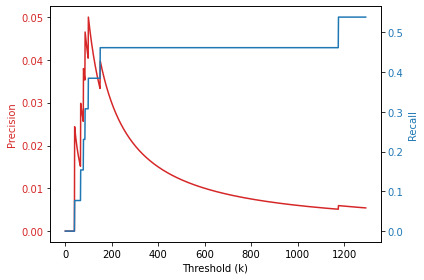

Graph for document 1


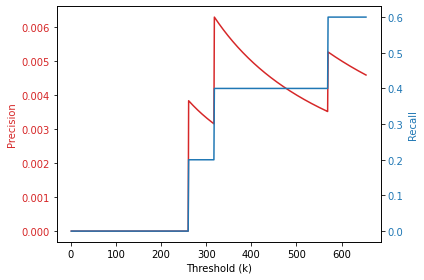

Graph for document 2


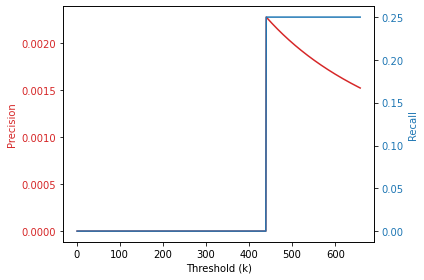

Graph for document 3


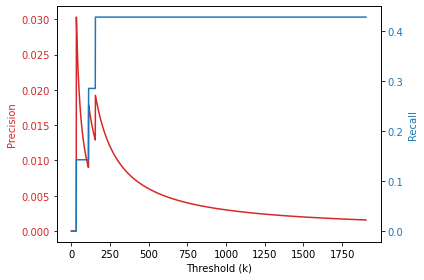

Graph for document 4


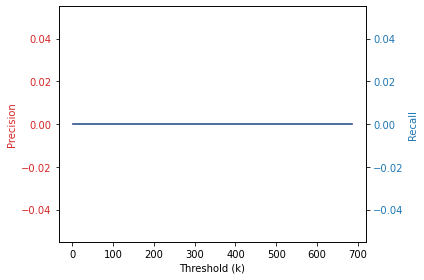

Graph for document 5


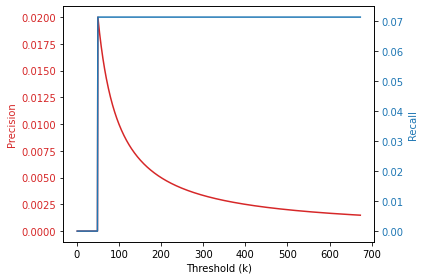

Graph for document 6


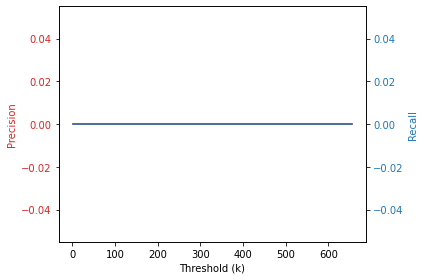

Graph for document 7


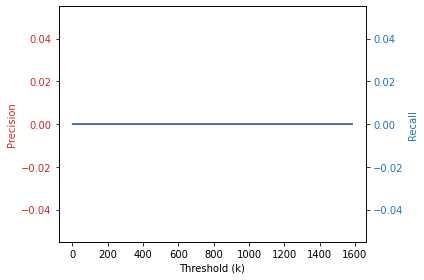

Graph for document 8


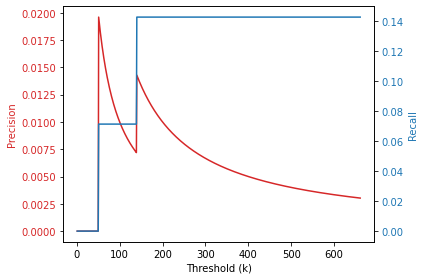

Graph for document 9


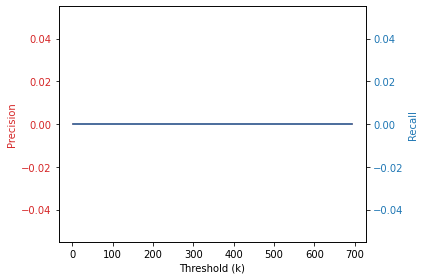

Graph for document 10


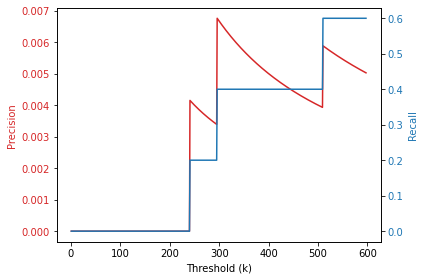

Graph for document 11


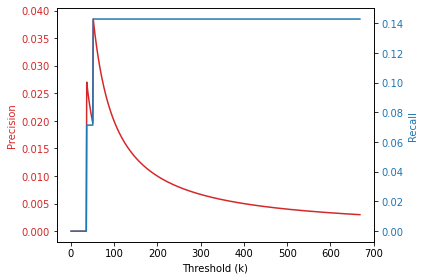

Graph for document 12


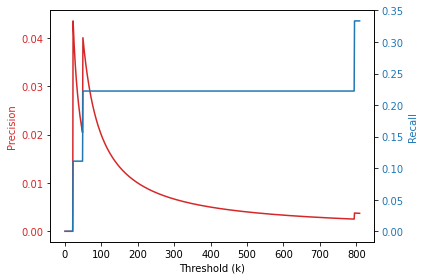

Graph for document 13


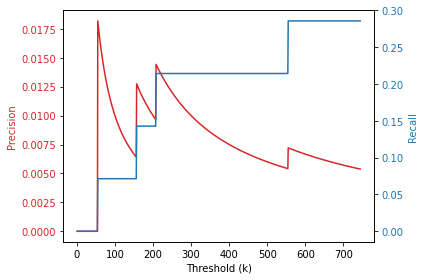

Graph for document 14


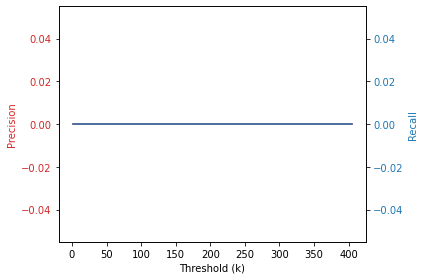

Graph for document 15


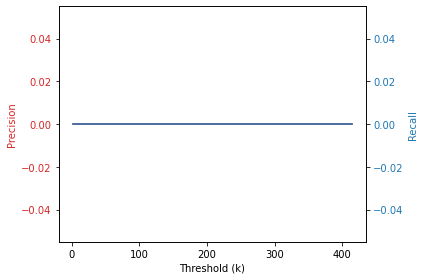

Graph for document 16


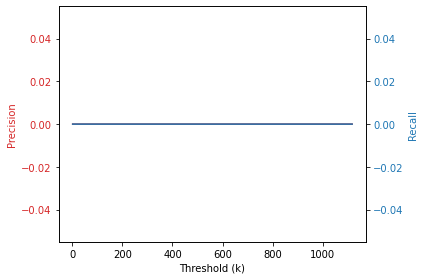

Graph for document 17


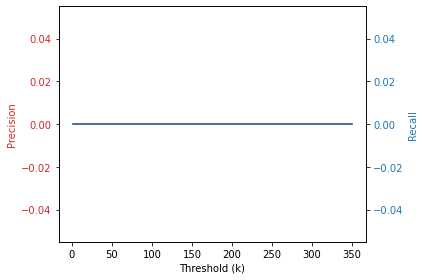

Graph for document 18


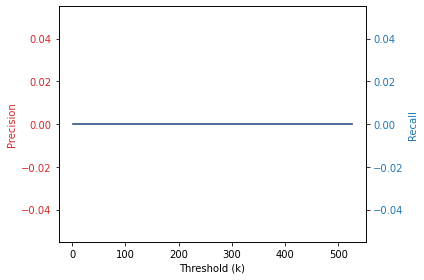

In [54]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


for i in range(len(precison_values_new)):
        print("Graph for document "+ str(i))
    
        # Create some mock data
        t = [x for x in range(1,(len(precison_values_new[i])+1))]
        data1 = precison_values_new[i]
        data2 = recall_values_new[i]

        fig, ax1 = plt.subplots()

        color = 'tab:red'
        ax1.set_xlabel('Threshold (k)')
        ax1.set_ylabel('Precision', color=color)
        ax1.plot(t, data1, color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        ax2.set_ylabel('Recall', color=color)  # we already handled the x-label with ax1
        ax2.plot(t, data2, color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  # otherwise the right y-label is slightly clipped
#         plt.savefig(str(i) + 'Document.png',  dpi=200)  #to save the plots
        plt.show()
      

In [55]:
test_new = [elem for elem in result[0]]
len(test_new)

1292

In [56]:
list(set(test_new).intersection(keywords_set[0]))

['promotion',
 'gesundheit',
 'promovierende',
 'mobilität',
 'betreuung',
 'finanzierung',
 'wissenschaftssystem']

In [57]:
test_new.index('promovierende')

1174

In [58]:
recall_indices_best = []
for i in range(len(recall_values_new)):
    recall_indices_best.append(recall_values_new[i].index(max(recall_values_new[i])))

In [59]:
recall_indices_best

[1174, 569, 439, 155, 0, 49, 0, 0, 139, 0, 509, 51, 794, 554, 0, 0, 0, 0, 0]

In [60]:
recall_indices_element_best = []

for i in range(len(recall_indices_best)):
    Recall_values = recall_values_new[i]
    recall_indices_element_best.append(Recall_values[recall_indices_best[i]])

In [61]:
recall_indices_element_best

[0.5384615384615384,
 0.6,
 0.25,
 0.42857142857142855,
 0.0,
 0.07142857142857142,
 0.0,
 0.0,
 0.14285714285714285,
 0.0,
 0.6,
 0.14285714285714285,
 0.3333333333333333,
 0.2857142857142857,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]